In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [9]:
df = pd.read_csv("billboard.csv")

In [11]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


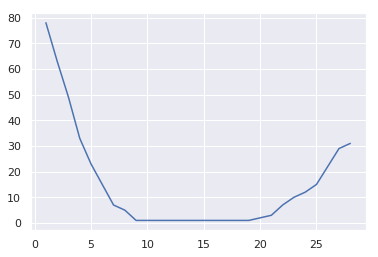

In [17]:
plt.plot(range(1,77),df.loc[0,'x1st.week':'x76th.week'])

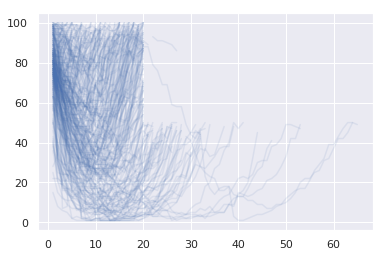

In [18]:
for index, row in df.iterrows():
    plt.plot(range(1,77), row['x1st.week':'x76th.week'], color='C0', alpha=0.1)

In [19]:
bshort = df[['artist.inverted','track','time','date.entered','x1st.week','x2nd.week','x3rd.week']]
bshort.head()

,artist.inverted,track,time,date.entered,x1st.week,x2nd.week,x3rd.week
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,78,63.0,49.0
1,Santana,"Maria, Maria",4:18,2000-02-12,15,8.0,6.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,71,48.0,43.0
3,Madonna,Music,3:45,2000-08-12,41,23.0,18.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,57,47.0,45.0


In [20]:
bshort.columns = ['artist','track','time','date.entered','wk1','wk2','wk3']

In [21]:
bmelt = bshort.melt(['artist','track','time','date.entered'],
                   ['wk1','wk2','wk3'],'week','rank')
bmelt.head()

,artist,track,time,date.entered,week,rank
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,wk1,78.0
1,Santana,"Maria, Maria",4:18,2000-02-12,wk1,15.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,wk1,71.0
3,Madonna,Music,3:45,2000-08-12,wk1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,wk1,57.0


In [22]:
bmelt.query('track == "Liar"')

,artist,track,time,date.entered,week,rank
66,Profyle,Liar,3:57,2000-09-16,wk1,52.0
383,Profyle,Liar,3:57,2000-09-16,wk2,32.0
700,Profyle,Liar,3:57,2000-09-16,wk3,25.0


In [24]:
bmelt['week'] = bmelt['week'].apply(lambda s: int(s[2]))

In [25]:
bmelt.head()

,artist,track,time,date.entered,week,rank
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,1,78.0
1,Santana,"Maria, Maria",4:18,2000-02-12,1,15.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,1,71.0
3,Madonna,Music,3:45,2000-08-12,1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,1,57.0


In [26]:
bmelt['date.entered'] = pd.to_datetime(bmelt['date.entered'])
bmelt.head()

,artist,track,time,date.entered,week,rank
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,1,78.0
1,Santana,"Maria, Maria",4:18,2000-02-12,1,15.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,1,71.0
3,Madonna,Music,3:45,2000-08-12,1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,1,57.0


In [27]:
bmelt['date.entered'][0] + pd.Timedelta('7 days')

Timestamp('2000-09-30 00:00:00')

In [28]:
bmelt['date'] = bmelt['date.entered'] + pd.Timedelta('7 days') * (bmelt['week']-1)
bmelt.head()

,artist,track,time,date.entered,week,rank,date
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,1,78.0,2000-09-23
1,Santana,"Maria, Maria",4:18,2000-02-12,1,15.0,2000-02-12
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,1,71.0,1999-10-23
3,Madonna,Music,3:45,2000-08-12,1,41.0,2000-08-12
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,1,57.0,2000-08-05


In [30]:
bmelt.drop(['date.entered'], axis = 1, inplace=True)

In [32]:
bfinal = bmelt[['artist','track','time','date','week','rank']]
bfinal.head()

,artist,track,time,date,week,rank
0,Destiny's Child,Independent Women Part I,3:38,2000-09-23,1,78.0
1,Santana,"Maria, Maria",4:18,2000-02-12,1,15.0
2,Savage Garden,I Knew I Loved You,4:07,1999-10-23,1,71.0
3,Madonna,Music,3:45,2000-08-12,1,41.0
4,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,2000-08-05,1,57.0


In [33]:
bfinal.sort_values(['artist','track'],inplace=True)

In [34]:
bfinal.head(3)

,artist,track,time,date,week,rank
246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-02-26,1,87.0
563,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-04,2,82.0
880,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-11,3,72.0


## Data Normalization

In [35]:
tracks = bfinal[['artist','track','time']].drop_duplicates()
tracks.head()

,artist,track,time
246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22
287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15
24,3 Doors Down,Kryptonite,3:53
193,3 Doors Down,Loser,4:24
69,504 Boyz,Wobble Wobble,3:35


In [36]:
tracks.index.name = 'id'
tracksid = tracks.reset_index()
tracksid.head()

,id,artist,track,time
0,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22
1,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15
2,24,3 Doors Down,Kryptonite,3:53
3,193,3 Doors Down,Loser,4:24
4,69,504 Boyz,Wobble Wobble,3:35


In [37]:
pd.merge(tracksid,bfinal, on=['track','artist']).head()

,id,artist,track,time_x,time_y,date,week,rank
0,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,4:22,2000-02-26,1,87.0
1,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,4:22,2000-03-04,2,82.0
2,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,4:22,2000-03-11,3,72.0
3,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,3:15,2000-09-02,1,91.0
4,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,3:15,2000-09-09,2,87.0


In [38]:
pd.merge(tracksid,bfinal, on=['track','artist','time']).head()

,id,artist,track,time,date,week,rank
0,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-02-26,1,87.0
1,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-04,2,82.0
2,246,2 Pac,Baby Don't Cry (Keep Ya Head Up II),4:22,2000-03-11,3,72.0
3,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-02,1,91.0
4,287,2Ge+her,The Hardest Part Of Breaking Up (Is Getting Ba...,3:15,2000-09-09,2,87.0


In [39]:
tidy = pd.merge(tracksid,bfinal, on=['track','artist','time']).drop(['track','artist','time'],axis=1)
tidy.head()

,id,date,week,rank
0,246,2000-02-26,1,87.0
1,246,2000-03-04,2,82.0
2,246,2000-03-11,3,72.0
3,287,2000-09-02,1,91.0
4,287,2000-09-09,2,87.0


In [40]:
tidy[tidy.week == 1]['rank'].idxmin()

756

In [41]:
tidy.loc[tidy[tidy.week == 1]['rank'].idxmin()]

id                        1
date    2000-02-12 00:00:00
week                      1
rank                     15
Name: 756, dtype: object

In [42]:
tracksid.query('id == 1')

,id,artist,track,time
252,1,Santana,"Maria, Maria",4:18
